In [1]:
# libraries

import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset

from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # encode categorical data

import matplotlib.pyplot as plt # for data visualization

import datetime

# Read in data into a dataframe 
df = pd.read_csv('/Users/shubpuri/Downloads/Rewards Network test/Restaurant.csv')
# Display top of dataframe
df.head()
from sklearn.preprocessing import scale
import scipy
from scipy.stats import spearmanr
from pylab import rcParams
from sklearn import metrics

In [2]:
# See the column data types and non-missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123652 entries, 0 to 123651
Data columns (total 16 columns):
DBA Name           123652 non-null object
AKA Name           122639 non-null object
License #          123652 non-null int64
Facility Type      123652 non-null object
Risk               123650 non-null object
Address            123652 non-null object
City               123584 non-null object
State              123630 non-null object
Zip                123629 non-null float64
Inspection Date    123652 non-null object
Inspection Type    123651 non-null object
Results            123652 non-null object
Violations         93525 non-null object
Latitude           123486 non-null float64
Longitude          123486 non-null float64
Location           123486 non-null object
dtypes: float64(3), int64(1), object(12)
memory usage: 15.1+ MB


In [3]:
df.describe()

License #            Zip       Latitude      Longitude
count  1.236520e+05  123629.000000  123486.000000  123486.000000
mean   1.681050e+06   60628.997606      41.889569     -87.675376
std    8.546970e+05      19.448566       0.075246       0.059658
min    0.000000e+00   60601.000000      41.644670     -87.914428
25%    1.358601e+06   60613.000000      41.855885     -87.703305
50%    2.013097e+06   60625.000000      41.895483     -87.663178
75%    2.298606e+06   60644.000000      41.941836     -87.634067
max    2.713203e+06   60827.000000      42.020808     -87.525094

Checking for null values

In [4]:


# Are there any columns that contain a missing value? If yes, substitute those with the mean value of each column!
df.isna().sum().sort_values(ascending=False)


Violations         30127
AKA Name            1013
Location             166
Longitude            166
Latitude             166
City                  68
Zip                   23
State                 22
Risk                   2
Inspection Type        1
Results                0
Inspection Date        0
Address                0
Facility Type          0
License #              0
DBA Name               0
dtype: int64

# NULL VALUES
variable Violations has the most null values of 30127, so we replace those with 0 inorder to create a new 'Other category'

In [5]:
df3=df.copy()
df3.tail()

df3['Violations'].fillna('0.', inplace=True)

In [6]:
df3['Violations'].shape

(123652,)

In [7]:
df3.isna().sum().sort_values(ascending=False)

AKA Name           1013
Location            166
Longitude           166
Latitude            166
City                 68
Zip                  23
State                22
Risk                  2
Inspection Type       1
Violations            0
Results               0
Inspection Date       0
Address               0
Facility Type         0
License #             0
DBA Name              0
dtype: int64

# Violations
The violations columns has a number attached followed by Violations list. We only need the number attached on it.

In [8]:
df['Violations']

0         3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...
1         23. PROPER DATE MARKING AND DISPOSITION - Comm...
2         3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...
3         49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Com...
4         3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...
                                ...                        
123647                                                  NaN
123648                                                  NaN
123649    33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...
123650    32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...
123651    30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...
Name: Violations, Length: 123652, dtype: object

In [9]:
#Extracting the Violation number from violations column
i=0
for token, _ in (entry.split(".", 1) for entry in df3['Violations']):
    df3['Violations'][i] = token
    i=i+1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
df3['Violations'] = df3['Violations'].astype('category',copy=False)

In [11]:
df3['Violations'].head()

0     3
1    23
2     3
3    49
4     3
Name: Violations, dtype: category
Categories (63, object): [0, 1, 10, 11, ..., 7, 70, 8, 9]

Now that we have a number for each violations, we create dummy variables for all the numbers

In [12]:
#Creating dummy variables from column Violations
df3=pd.get_dummies(df3, columns=['Violations'])



In [13]:
df3.isna().sum().sort_values(ascending=False)



AKA Name         1013
Latitude          166
Longitude         166
Location          166
City               68
                 ... 
Violations_42       0
Violations_43       0
Violations_44       0
Violations_45       0
DBA Name            0
Length: 78, dtype: int64

In [14]:
df3.shape

(123652, 78)

In [15]:
dataset=df3.copy()

In [16]:
dataset.columns

Index(['DBA Name', 'AKA Name', 'License #', 'Facility Type', 'Risk', 'Address',
       'City', 'State', 'Zip', 'Inspection Date', 'Inspection Type', 'Results',
       'Latitude', 'Longitude', 'Location', 'Violations_0', 'Violations_1',
       'Violations_10', 'Violations_11', 'Violations_12', 'Violations_13',
       'Violations_14', 'Violations_15', 'Violations_16', 'Violations_17',
       'Violations_18', 'Violations_19', 'Violations_2', 'Violations_20',
       'Violations_21', 'Violations_22', 'Violations_23', 'Violations_24',
       'Violations_25', 'Violations_26', 'Violations_27', 'Violations_28',
       'Violations_29', 'Violations_3', 'Violations_30', 'Violations_31',
       'Violations_32', 'Violations_33', 'Violations_34', 'Violations_35',
       'Violations_36', 'Violations_37', 'Violations_38', 'Violations_39',
       'Violations_4', 'Violations_40', 'Violations_41', 'Violations_42',
       'Violations_43', 'Violations_44', 'Violations_45', 'Violations_46',
       'Violation

# Dependent Variable- RESULTS

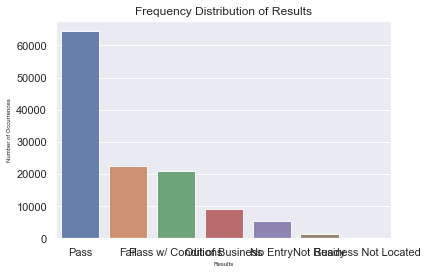

Pass                    64455
Fail                    22452
Pass w/ Conditions      20816
Out of Business          9170
No Entry                 5449
Not Ready                1289
Business Not Located       21
Name: Results, dtype: int64

In [17]:
#Our dependent variable is Results. 
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
racegrp_count = dataset['Results'].value_counts()
sns.set(style="darkgrid")
sns.barplot(racegrp_count.index, racegrp_count.values, alpha=0.9)
plt.title('Frequency Distribution of Results')
plt.ylabel('Number of Occurrences', fontsize=6)
plt.xlabel('Results', fontsize=6)
plt.show()

dataset['Results'].value_counts()



In [18]:
dataset['Results'] = np.where(dataset['Results']=='Pass','Pass',np.where(dataset['Results']=='Pass w/ Conditions', 'Pass',np.where(dataset['Results']=='Fail', 'Fail', 'Other'))) 
print(dataset['Results'].value_counts())

Pass     85271
Fail     22452
Other    15929
Name: Results, dtype: int64


Looking at the dataset we can convert Pass W conditions into Pass and put all the other values except Fail into other.
So, now our dependent variable only has 2 categories- PASS or FAIL and can be used as a binary variable


In [19]:
#Removing NULL values from the column zipcode and converting it into Category'/.
dataset['Zip'] = dataset['Zip'].fillna(0.0).astype(int)
dataset['Zip'] = pd.Categorical(dataset.Zip)
List_Of_Categories=list(dataset['Zip'].value_counts().index)


Extracting Month and Year from the Inspection Date column

In [20]:
#Converting column Inspection Date into Date-time format and extracting Month and Year from it.
dataset['Inspection Date'] = pd.to_datetime(dataset['Inspection Date'], errors='coerce')
dataset['year'] = dataset['Inspection Date'].dt.year
dataset['month'] = dataset['Inspection Date'].dt.month

In [21]:
dataset['year']=dataset['year'].astype(str)
dataset['month']=dataset['month'].astype(str)




In [22]:
max(dataset['Inspection Date'])

Timestamp('2020-02-13 00:00:00')

In [23]:
min(dataset['Inspection Date'])

Timestamp('2011-01-04 00:00:00')

In [24]:
dataset['Inspection Date New'] = dataset['year'] + '_' + dataset['month']

In [25]:
dataset['Inspection Date New'] = pd.Categorical(dataset['Inspection Date New'])

In [26]:
# we need to first check the data types of variables in the data frame which are categorical and which are not

dataset.dtypes

DBA Name                 object
AKA Name                 object
License #                 int64
Facility Type            object
Risk                     object
                         ...   
Violations_8              uint8
Violations_9              uint8
year                     object
month                    object
Inspection Date New    category
Length: 81, dtype: object

# BI-VARIATE ANALYSIS OF INDEPENDENT VARIABLES WITH THE DEPENDENT VARIABLE

CITY vs RESULTS:

Text(0, 0.5, 'Results')

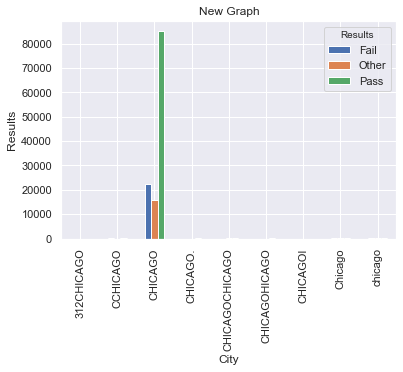

In [27]:
%matplotlib inline

pd.crosstab(dataset['City'],dataset['Results']).plot(kind='bar')
plt.title('New Graph')
plt.xlabel('City')
plt.ylabel('Results')


This feature doesn't bring anything to the table as the Data is only for Chicago as can be seen from the plot below, so removing this feature will not affect our dependent variable

# STATE vs RESULTS:

Text(0, 0.5, 'Results')

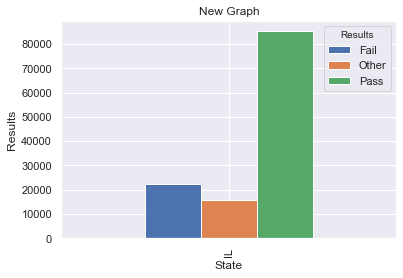

In [28]:
pd.crosstab(dataset['State'],dataset['Results']).plot(kind='bar')
plt.title('New Graph')
plt.xlabel('State')
plt.ylabel('Results')

# The Data is only for Illinois state as can be seen from the plot below, 
# so removing this feature will not affect our dependent variable

This feature doesn't bring anything to the table as the Data is only for Illinois as can be seen from the plot below, so removing this feature will not affect our dependent variable

# RISK vs RESULTS:

Text(0, 0.5, 'Results')

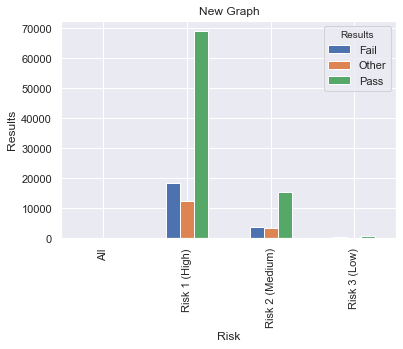

In [29]:
pd.crosstab(dataset['Risk'],dataset['Results']).plot(kind='bar')
plt.title('New Graph')
plt.xlabel('Risk')
plt.ylabel('Results')



The Plot shows that there are three risk which has dependency with our dependent variable, hence we will use this feature for our final model

# FACILITY TYPE vs RESULTS:

Text(0, 0.5, 'Results')

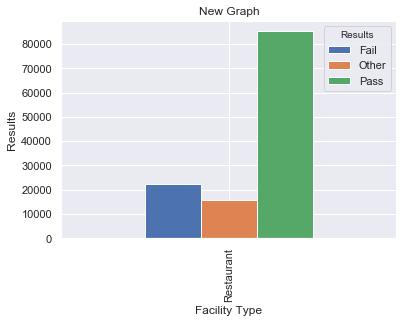

In [30]:
%matplotlib inline

pd.crosstab(dataset['Facility Type'],dataset['Results']).plot(kind='bar')
plt.title('New Graph')
plt.xlabel('Facility Type')
plt.ylabel('Results')

# The Data is only for Restaurant as can be seen from the plot below, 
# so removing this feature will not affect our dependent variable

This feature doesn't bring anything to the table as the Data is only for Restaurant as can be seen from the plot below, so removing this feature will not affect our dependent variable

For our dependent variable, lets drop the OTHER category and make it a binary variable with Pass/Fail values.

In [31]:
#Drop the rows where Column Results = Other as they are not very useful for Analysis 
dataset = dataset.drop(dataset['Results']
                                     [dataset['Results']=='Other'].index)

In [32]:
dataset.shape

(107723, 81)

In [33]:
print(dataset['Results'].value_counts())

Pass    85271
Fail    22452
Name: Results, dtype: int64


In [34]:
dataset.isna().sum().sort_values(ascending=False)



AKA Name         683
Latitude         149
Longitude        149
Location         149
City              52
                ... 
Violations_44      0
Violations_45      0
Violations_46      0
Violations_47      0
DBA Name           0
Length: 81, dtype: int64

In [35]:
dataset.columns

Index(['DBA Name', 'AKA Name', 'License #', 'Facility Type', 'Risk', 'Address',
       'City', 'State', 'Zip', 'Inspection Date', 'Inspection Type', 'Results',
       'Latitude', 'Longitude', 'Location', 'Violations_0', 'Violations_1',
       'Violations_10', 'Violations_11', 'Violations_12', 'Violations_13',
       'Violations_14', 'Violations_15', 'Violations_16', 'Violations_17',
       'Violations_18', 'Violations_19', 'Violations_2', 'Violations_20',
       'Violations_21', 'Violations_22', 'Violations_23', 'Violations_24',
       'Violations_25', 'Violations_26', 'Violations_27', 'Violations_28',
       'Violations_29', 'Violations_3', 'Violations_30', 'Violations_31',
       'Violations_32', 'Violations_33', 'Violations_34', 'Violations_35',
       'Violations_36', 'Violations_37', 'Violations_38', 'Violations_39',
       'Violations_4', 'Violations_40', 'Violations_41', 'Violations_42',
       'Violations_43', 'Violations_44', 'Violations_45', 'Violations_46',
       'Violation

# MONTH vs RESULTS

Text(0, 0.5, 'Results')

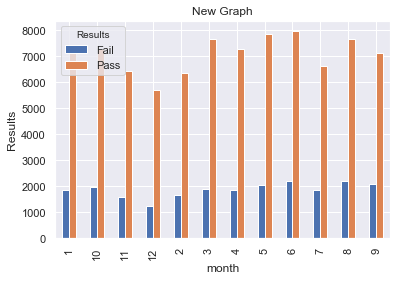

In [36]:
pd.crosstab(dataset['month'],dataset['Results']).plot(kind='bar')
plt.title('New Graph')
plt.xlabel('month')
plt.ylabel('Results')

# The plot clearly depcits the relationship of the dependent variable with the month {1 represents "Jan" ,  while 12 represents dec} 
# so we will use this feature in our final model 

# MONTH vs YEAR

Text(0, 0.5, 'Results')

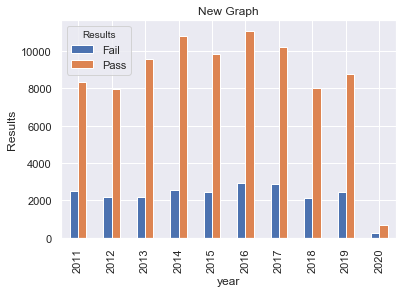

In [37]:
pd.crosstab(dataset['year'],dataset['Results']).plot(kind='bar')
plt.title('New Graph')
plt.xlabel('year')
plt.ylabel('Results')

# The plot clearly depcits the relationship of the dependent variable with the year  
# so we will use this feature in our final model 

# INSPECTION TYPE vs RESULTS

Text(0, 0.5, 'Results')

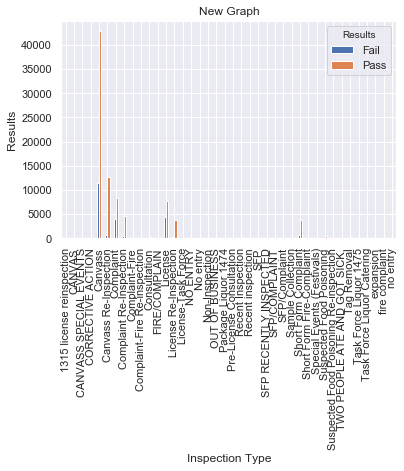

In [38]:
pd.crosstab(dataset['Inspection Type'],dataset['Results']).plot(kind='bar')
plt.title('New Graph')
plt.xlabel('Inspection Type')
plt.ylabel('Results')

# Lets look at Inspection Type
The distribution between categories is uneven so we create a new category 'Other' which will contain all the categories with less distribution

In [39]:
dataset['Inspection Type'].value_counts(dropna=True)

#Here we can see that most of the Inspection Type is Canvass and canvass reinspection with Licesnse and Complaint foloowing next


Canvass                                   54249
Canvass Re-Inspection                     13534
Complaint                                 12318
License                                   12060
Complaint Re-Inspection                    5120
Short Form Complaint                       4355
License Re-Inspection                      4143
Suspected Food Poisoning                    539
Tag Removal                                 279
Consultation                                232
Recent Inspection                           217
License-Task Force                          186
Task Force Liquor 1475                      144
Suspected Food Poisoning Re-inspection      132
Complaint-Fire                               75
Short Form Fire-Complaint                    69
Complaint-Fire Re-inspection                 25
Pre-License Consultation                      8
Non-Inspection                                7
Package Liquor 1474                           4
Special Events (Festivals)              

In [40]:
#Inspection type variable has various categories with assymenteric distribution.
#So we create new bins for all the categories with less information
dataset['Inspection Type'] = np.where(dataset['Inspection Type']=='Canvass','Canvass',np.where(dataset['Inspection Type']=='Canvass Re-Inspection', 'Canvass Re-Inspection',np.where(dataset['Inspection Type']=='Complaint', 'Complaint',np.where(dataset['Inspection Type']=='License','License','Other'))))
print(dataset['Inspection Type'].value_counts())

Canvass                  54249
Other                    15562
Canvass Re-Inspection    13534
Complaint                12318
License                  12060
Name: Inspection Type, dtype: int64


In [41]:
dataset['Inspection Type']=dataset['Inspection Type'].astype('category',copy=False)

In [42]:
dataset.columns

Index(['DBA Name', 'AKA Name', 'License #', 'Facility Type', 'Risk', 'Address',
       'City', 'State', 'Zip', 'Inspection Date', 'Inspection Type', 'Results',
       'Latitude', 'Longitude', 'Location', 'Violations_0', 'Violations_1',
       'Violations_10', 'Violations_11', 'Violations_12', 'Violations_13',
       'Violations_14', 'Violations_15', 'Violations_16', 'Violations_17',
       'Violations_18', 'Violations_19', 'Violations_2', 'Violations_20',
       'Violations_21', 'Violations_22', 'Violations_23', 'Violations_24',
       'Violations_25', 'Violations_26', 'Violations_27', 'Violations_28',
       'Violations_29', 'Violations_3', 'Violations_30', 'Violations_31',
       'Violations_32', 'Violations_33', 'Violations_34', 'Violations_35',
       'Violations_36', 'Violations_37', 'Violations_38', 'Violations_39',
       'Violations_4', 'Violations_40', 'Violations_41', 'Violations_42',
       'Violations_43', 'Violations_44', 'Violations_45', 'Violations_46',
       'Violation

# Removing the columns which are not required 

In [43]:
cols=['AKA Name', 'License #', 'Address','City','State','Inspection Date','Latitude','Longitude','Location']

x= dataset.drop(cols, axis=1) # attributes to determine dependent variable / Class


In [44]:
x.isna().sum()

DBA Name               0
Facility Type          0
Risk                   2
Zip                    0
Inspection Type        0
                      ..
Violations_8           0
Violations_9           0
year                   0
month                  0
Inspection Date New    0
Length: 72, dtype: int64

In [45]:
x.head()

DBA Name Facility Type           Risk    Zip  \
0          MORRY'S DELI    Restaurant  Risk 1 (High)  60637   
1       EL TACONAZO JR.    Restaurant  Risk 1 (High)  60639   
2   OSTERIA DEL PASTAIO    Restaurant  Risk 1 (High)  60611   
3  LA TAPENADE GATE H14    Restaurant  Risk 1 (High)  60666   
4          JERK FACTORY    Restaurant  Risk 1 (High)  60653   

         Inspection Type Results  Violations_0  Violations_1  Violations_10  \
0  Canvass Re-Inspection    Fail             0             0              0   
1                  Other    Fail             0             0              0   
2              Complaint    Fail             0             0              0   
3                Canvass    Pass             0             0              0   
4  Canvass Re-Inspection    Pass             0             0              0   

   Violations_11  ...  Violations_6  Violations_60  Violations_61  \
0              0  ...             0              0              0   
1              0  ...             0              0              0   
2              0  ...             0              0              0   
3              0  ...             0              0              0   
4              0  ...             0              0              0   

   Violations_7  Violations_70  Violations_8  Violations_9  year  month  \
0             0              0             0             0  2019      9   
1             0              0             0             0  2019     10   
2             0              0             0             0  2019      3   
3             0              0             0             0  2019      3   
4             0              0             0             0  2018      8   

   Inspection Date New  
0               2019_9  
1              2019_10  
2               2019_3  
3               2019_3  
4               2018_8  

[5 rows x 72 columns]

In [46]:
dataset.columns

Index(['DBA Name', 'AKA Name', 'License #', 'Facility Type', 'Risk', 'Address',
       'City', 'State', 'Zip', 'Inspection Date', 'Inspection Type', 'Results',
       'Latitude', 'Longitude', 'Location', 'Violations_0', 'Violations_1',
       'Violations_10', 'Violations_11', 'Violations_12', 'Violations_13',
       'Violations_14', 'Violations_15', 'Violations_16', 'Violations_17',
       'Violations_18', 'Violations_19', 'Violations_2', 'Violations_20',
       'Violations_21', 'Violations_22', 'Violations_23', 'Violations_24',
       'Violations_25', 'Violations_26', 'Violations_27', 'Violations_28',
       'Violations_29', 'Violations_3', 'Violations_30', 'Violations_31',
       'Violations_32', 'Violations_33', 'Violations_34', 'Violations_35',
       'Violations_36', 'Violations_37', 'Violations_38', 'Violations_39',
       'Violations_4', 'Violations_40', 'Violations_41', 'Violations_42',
       'Violations_43', 'Violations_44', 'Violations_45', 'Violations_46',
       'Violation

# Chi-Squared Test to check the significance along the dependent variable
Performing a chi-sq test on all the categorical variables to check for significance

In [47]:
col=['Facility Type','Risk','Inspection Type','month','year','Inspection Date New','Results']
chisq=dataset[col].astype('category')

In [48]:

#Now we check Categorical variables that are statistically significant( p-value < 5% )
from scipy.stats import chisquare
import scipy.stats as stats
import numpy as np
for series in chisq:
    nl = "\n"
    crosstab = pd.crosstab(chisq[f"{series}"], chisq['Results'])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")
 

Results         Fail   Pass
Facility Type              
Restaurant     22452  85271 

Chi2 value= 0.0
p-value= 1.0
Degrees of freedom= 0

Results           Fail   Pass
Risk                         
All                  1      0
Risk 1 (High)    18433  69061
Risk 2 (Medium)   3766  15453
Risk 3 (Low)       250    757 

Chi2 value= 34.2996188766506
p-value= 1.7126418437832507e-07
Degrees of freedom= 3

Results                 Fail   Pass
Inspection Type                    
Canvass                11434  42815
Canvass Re-Inspection    761  12773
Complaint               4045   8273
License                 4336   7724
Other                   1876  13686 

Chi2 value= 5373.873400898276
p-value= 0.0
Degrees of freedom= 4

Results  Fail  Pass
month              
1        1834  7331
10       1947  7263
11       1598  6441
12       1249  5692
2        1669  6349
3        1895  7661
4        1859  7262
5        2046  7854
6        2213  7973
7        1836  6632
8        2214  7679
9        2092  7

Based on the above analysis, we can see that :
    Facility type has p value > 1, hence it is not significant
    Risk has a p value < 0.05, hence it is significant. Also, RISK ALL only has 1 value so we can remove it.
    Inspection Type has a p value of 0.0, it is not much significant
    Month has a p value < 0.05, hence it is significant 
    year has a p value < 0.05. hence is is significant
    

In [49]:
#Looking at the dataset we can convert Pass W conditions into Pass and put all the other values except Fail into other.

x['Results'] = np.where(x['Results']=='Pass',1,np.where(x['Results']=='Fail', 0, 'Other'))
print(x['Results'].value_counts())

1    85271
0    22452
Name: Results, dtype: int64


In [50]:
y= x['Results']

In [51]:
y.shape

(107723,)

In [52]:
cols=['Facility Type', 'Risk','Zip','Inspection Type','year','month','Inspection Date New']
x[cols] = x[cols].astype('category',copy=False)

In [53]:
x=x.drop(columns=['Facility Type','Inspection Date New'])

In [54]:
x['Inspection Type'].dtypes

CategoricalDtype(categories=['Canvass', 'Canvass Re-Inspection', 'Complaint', 'License',
                  'Other'],
                 ordered=False)

In [55]:
x.columns

Index(['DBA Name', 'Risk', 'Zip', 'Inspection Type', 'Results', 'Violations_0',
       'Violations_1', 'Violations_10', 'Violations_11', 'Violations_12',
       'Violations_13', 'Violations_14', 'Violations_15', 'Violations_16',
       'Violations_17', 'Violations_18', 'Violations_19', 'Violations_2',
       'Violations_20', 'Violations_21', 'Violations_22', 'Violations_23',
       'Violations_24', 'Violations_25', 'Violations_26', 'Violations_27',
       'Violations_28', 'Violations_29', 'Violations_3', 'Violations_30',
       'Violations_31', 'Violations_32', 'Violations_33', 'Violations_34',
       'Violations_35', 'Violations_36', 'Violations_37', 'Violations_38',
       'Violations_39', 'Violations_4', 'Violations_40', 'Violations_41',
       'Violations_42', 'Violations_43', 'Violations_44', 'Violations_45',
       'Violations_46', 'Violations_47', 'Violations_48', 'Violations_49',
       'Violations_5', 'Violations_50', 'Violations_51', 'Violations_52',
       'Violations_53', '

In [56]:
x=pd.get_dummies(x, columns=['Inspection Type'])

In [57]:
x=pd.get_dummies(x, columns=['Risk'])

In [58]:
x= x.drop(columns=['DBA Name'])

x= x.drop(columns=['Violations_0'])
x= x.drop(columns=['Risk_All'])
x= x.drop(columns=['Risk_Risk 3 (Low)'])
x= x.drop(columns=['Risk_Risk 2 (Medium)'])

x= x.drop(columns=['Inspection Type_Other'])


In [59]:
x.columns

Index(['Zip', 'Results', 'Violations_1', 'Violations_10', 'Violations_11',
       'Violations_12', 'Violations_13', 'Violations_14', 'Violations_15',
       'Violations_16', 'Violations_17', 'Violations_18', 'Violations_19',
       'Violations_2', 'Violations_20', 'Violations_21', 'Violations_22',
       'Violations_23', 'Violations_24', 'Violations_25', 'Violations_26',
       'Violations_27', 'Violations_28', 'Violations_29', 'Violations_3',
       'Violations_30', 'Violations_31', 'Violations_32', 'Violations_33',
       'Violations_34', 'Violations_35', 'Violations_36', 'Violations_37',
       'Violations_38', 'Violations_39', 'Violations_4', 'Violations_40',
       'Violations_41', 'Violations_42', 'Violations_43', 'Violations_44',
       'Violations_45', 'Violations_46', 'Violations_47', 'Violations_48',
       'Violations_49', 'Violations_5', 'Violations_50', 'Violations_51',
       'Violations_52', 'Violations_53', 'Violations_54', 'Violations_55',
       'Violations_56', 'Viol

In [60]:
X=x.copy()
z = x.copy()

In [61]:
X= x.drop(columns=['Results'])

In [62]:
y

0         0
1         0
2         0
3         1
4         1
         ..
123647    1
123648    1
123649    1
123650    1
123651    1
Name: Results, Length: 107723, dtype: object

# TRAIN - TEST -  SPLIT

In [63]:
#Dividing the Training dataset into further Train and Validate to check the accuracy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.20)

In [64]:
X.shape

(107723, 70)

In [65]:
y.shape

(107723,)

# FEATURE SELECTION

In [66]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg,25)
rfe = rfe.fit(X_train, y_train )
print(rfe.support_)
print(rfe.ranking_)

[ True False False  True False False False False  True False  True  True
  True False  True False False  True False False False False  True  True
  True  True  True  True  True  True False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False  True  True  True  True  True  True  True]
[ 1  4  5  1  2 11  7 40  1 35  1  1  1 38  1 10 25  1 27 12 41 20  1  1
  1  1  1  1  1  1  8 13  1 28 24 14  9 23 22 33 17 43 15 39 18 21 32 19
 37 29 45 16 34 30 26 36  6 42 44 31 46  1  3  1  1  1  1  1  1  1]


All the TRUE features in the above analysis are highly significant to our dependent variable and we can remove the rest of the columns

In [67]:
#The Recursive Feature Elimination (RFE) has helped us select the following features:
#    'const', 'Zip', 'Violations_0','Violations_16','Violations_18''Violations_2',''

# Further splitting the TRAIN Dataset into Training and Validation

In [68]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(
         X_train, y_train, test_size=0.30)

10 FOLD CROSS VAILDATION to get the best accuracy

In [69]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=25)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train2, y_train2, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


10-fold cross validation average accuracy: 0.792


We got an accuracy of 79.4% after the K-fold Validation on our dataset.

In [70]:
from sklearn.linear_model import LogisticRegression

#Fit the model on the new Train and validation set

logmodel = LogisticRegression()
logmodel.fit(X_train2,y_train2)




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
pred2=logmodel.predict(X_test2)

# Confusion Matrix 

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test2,pred2)


array([[    0,  5388],
       [    0, 20466]])

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2,pred2)

0.791598978881411

# Now we use this model to predict on the TEST DATASET.

In [83]:
pred=logmodel.predict(X_test)

In [84]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logmodel.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4490
           1       0.79      1.00      0.88     17055

    accuracy                           0.79     21545
   macro avg       0.40      0.50      0.44     21545
weighted avg       0.63      0.79      0.70     21545



In [86]:
print(logmodel.coef_)

[[ 2.19837497e-05 -1.92763893e-11 -1.89879117e-11 -6.75446980e-11
  -2.41145596e-11 -9.46951252e-12 -1.63020023e-11 -3.73413700e-13
  -9.72185058e-11 -8.39478703e-13 -3.46184556e-10 -4.56976184e-11
  -1.08861141e-10 -2.49958627e-13  3.88875155e-11 -1.16122109e-11
   2.39826521e-12 -3.62401842e-11  1.98462009e-12 -9.51891171e-12
  -1.79141890e-13  3.74952435e-12 -8.98776733e-11 -3.32027820e-11
   1.60775511e-10  6.42826495e-11  3.48964508e-10  2.39260889e-10
   1.20691406e-10  5.88836118e-11  1.62442549e-11  8.71813819e-12
   3.97749305e-11  1.61555979e-12 -1.47907168e-12  8.25483569e-12
   1.22010865e-11  2.68648777e-12  2.88668196e-12  8.82082420e-13
   7.33749314e-12  4.01096503e-14  7.51894673e-12 -1.88496046e-14
   5.16246298e-12  3.69976321e-12 -9.87318617e-13  3.70376696e-12
   5.61418899e-13  1.22728275e-12  3.60892820e-13  6.72302067e-12
   9.19066444e-13  1.08267120e-12  2.12511274e-12 -3.30170642e-13
  -1.87189674e-11 -1.69845313e-13  0.00000000e+00 -1.41345189e-12
   0.00000

In [87]:
print(logmodel.intercept_)

[3.63112055e-10]


Therefore, the estimated log odds that a restaurant will pass the inspection is 3.63112055e-10

# Applying K-nearestneighbor 

In [88]:
#Split X_train again into X_train_inner, X_val, y_train_inner, y_val (We have an inner training set, and the validation set)
X_train_inner, X_val, y_train_inner, y_val = train_test_split(X_train, y_train, test_size=0.2)
print (X_train_inner.shape, y_train_inner.shape)
print (X_val.shape, y_val.shape)

(68942, 70) (68942,)
(17236, 70) (17236,)


In [89]:
# Standardize the training set, and then apply the transformation values to the val set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train_inner)
X_train_inner_std = scaler.transform(X_train_inner)
X_val_std  = scaler.transform(X_val)

In [90]:
# Fit a K-nearest neighbor classifier model to X_train_inner_std data --> Change the value of n_neighbors here and report the accuracies you get
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train_inner_std, y_train_inner)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [91]:
print(len((X_train_inner)))

68942


In [92]:
# Print accuracy on your validation data (X_val_std)
classifier.score(X_val_std,y_val)

0.8857623578556509

In [93]:
# Print accuracy on your training data (X_train_inner_std)
classifier.score(X_train_inner_std,y_train_inner)

0.9087638884859737

# PREDICTING ON TEST DATA

In [94]:
predknn=classifier.predict(X_test)

# Thus, K-NN model has a better accuracy than the Logistic Regression model.
# Hence, we use KNN to predict on our test dataset.

In [ ]:
'''from sklearn.pipeline import Pipeline

scaler = StandardScaler()
clf = KNeighborsClassifier()
pipeline = Pipeline([('transformer', scaler), ('estimator', clf)])

# param_candidate defines the set of hyperparameters that you want your function to analyze
from sklearn.model_selection import GridSearchCV
param_candidate = [{'estimator__n_neighbors': np.arange(5, 6)}]

clf = GridSearchCV(pipeline, param_grid=param_candidate, cv=10)

clf.fit(X_train,y_train)

# print clf.best_score_ (refer to Python's documentation for the attributes of clf)
print('Best score for data1:', clf.best_score_)

# View the best parameters for the model found using grid search
print('Best k:',clf.best_params_)'''

In [95]:
df0 = pd.DataFrame(predknn)

In [96]:
df0.to_csv (r'/Users/shubpuri/Downloads/Rewards Network Test/Challenge 2.csv', index=False)